# PyCC Example

In [86]:
import PyCC #import PyCC
import numpy as np #import numpy
import matplotlib.pyplot as plt #import matplotlib

## Configure the distribution

In [87]:
nsteps = 100
n = 100
r = 100
p = 10

## Generate distribution

In [88]:
#generate an input
input_df = PyCC.Distributions.Uniform(r=r,n=n,p=p)
print(input_df)

            x          y          z   vx   vy   vz           mass
0   -9.778754 -14.923112  74.109360  0.0  0.0  0.0  418879.020479
1   55.659737  50.879931  35.052029  0.0  0.0  0.0  418879.020479
2   80.492747 -29.113723  34.894571  0.0  0.0  0.0  418879.020479
3  -28.388502 -63.951667   0.306796  0.0  0.0  0.0  418879.020479
4  -26.813215  13.616158  57.905765  0.0  0.0  0.0  418879.020479
..        ...        ...        ...  ...  ...  ...            ...
95  52.491623 -72.530927  27.507677  0.0  0.0  0.0  418879.020479
96  61.880282  15.033717 -45.127898  0.0  0.0  0.0  418879.020479
97  14.234263  33.188824  14.860429  0.0  0.0  0.0  418879.020479
98 -61.283188 -22.301299   6.326132  0.0  0.0  0.0  418879.020479
99 -29.577481  82.091014  19.388207  0.0  0.0  0.0  418879.020479

[100 rows x 7 columns]


## Evaluate using the GPU

In [89]:
#evaluate using GPU acceleration
out_gpu,stats_gpu = PyCC.evaluate(df=input_df,algo="directsum",accelerate=True,steps=nsteps)
print("GPU stats:",stats_gpu)
print(out_gpu)

GPU stats: {'eval_time': 0.22727754200002437, 'n_batches': 1, 'batch_times': array([0.00160296])}
       id             x             y            z            ax  \
0       0     -9.778754    -14.923112    74.109360 -3.026983e-08   
1       1     55.659737     50.879931    35.052029 -1.558861e-07   
2       2     80.492747    -29.113723    34.894571 -1.702645e-07   
3       3    -28.388502    -63.951667     0.306796  3.997507e-08   
4       4    -26.813215     13.616158    57.905765  4.966899e-08   
...    ..           ...           ...          ...           ...   
10095  95   1128.263309   1501.603355 -2878.992334 -6.628693e-11   
10096  96   -650.236080   -428.105890   107.730967  2.354076e-09   
10097  97 -37402.971094  30535.950289  8957.179252  8.574880e-13   
10098  98    151.539482     44.305480   -63.270048  8.255785e-09   
10099  99     17.068626     12.621477   110.949441 -2.245768e-08   

                 ay            az        vx        vy        vz           phi  
0    

## Get the positions out

In [90]:
#select just the positions, and reshape to get each timestep
position_gpu = np.reshape(out_gpu.loc[:,["x","y","z"]].to_numpy(),(nsteps+1,n,3))
print(position_gpu.shape)

(101, 100, 3)


## Evaluate without GPU

In [91]:
#evaluate without GPU acceleration
out_nogpu,stats_nogpu = PyCC.evaluate(df=input_df,algo="directsum",accelerate=False,steps=nsteps)
print("NOGPU stats:",stats_nogpu)
print(out_nogpu)

NOGPU stats: {'eval_time': 0.20237908299998253}
       id             x             y            z            ax  \
0       0     -9.778754    -14.923112    74.109360 -3.026983e-08   
1       1     55.659737     50.879931    35.052029 -1.558861e-07   
2       2     80.492747    -29.113723    34.894571 -1.702645e-07   
3       3    -28.388502    -63.951667     0.306796  3.997509e-08   
4       4    -26.813215     13.616158    57.905765  4.966897e-08   
...    ..           ...           ...          ...           ...   
10095  95   1128.272791   1501.571614 -2878.990104 -6.566989e-11   
10096  96   -560.151362   -584.692955   262.870702  1.697657e-09   
10097  97 -37402.418479  30534.726727  8957.332906  8.574891e-13   
10098  98    115.218778    142.977300   -53.008553  6.731959e-08   
10099  99      1.041473     18.435685    61.077962  4.154897e-09   

                 ay            az        vx        vy        vz           phi  
0     -1.755128e-08 -2.352945e-07  0.000000  0.000000  

## Get positions out

In [92]:
#select just positions
position_nogpu = np.reshape(out_nogpu.loc[:,["x","y","z"]].to_numpy(),(nsteps+1,n,3))
print(position_nogpu.shape)

(101, 100, 3)


## Compare the two outputs

In [93]:
#compare the difference between the two
diff = np.mean(np.mean(np.abs(position_gpu - position_nogpu),axis=2),axis=1)
print(diff.shape)

(101,)


## Plot this

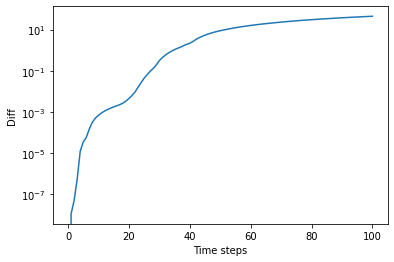

In [96]:
#plot this difference over time
plt.plot(diff)
plt.ylabel("Diff")
plt.xlabel("Time steps")
plt.yscale('log')
plt.show()

## We can plot the max particle distance from center over time.

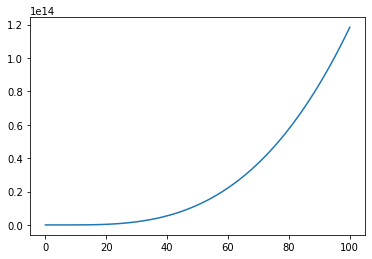

In [98]:
max_pos_gpu = np.max(np.linalg.norm(position_gpu,axis=2),axis=1)
plt.plot(max_pos_gpu**3)
plt.show()

## At around some point, a particle gets ejected. GPU does float32 calculations while no GPU does float64. So the floating point error goes up.